<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

<font color='red'>
Roei Mesilaty, 315253336   
</font>


## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

C:\Users\RoeiM\AppData\Local\Temp\ipykernel_11284\1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


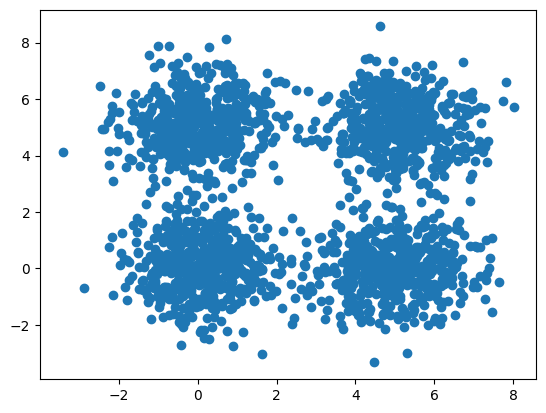

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [4]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None          # The dataset X
        self.labels_ = None         # The final labels (cluster indices for all samples)
        self.centroids = None       # The final centroids
        self.labels_history = []    # The labels of each iteration
        self.centroids_history = [] # The centroids of each iteration
        self.costs = []             # The costs of the iterations
        
    def fit(self, X):
        self.X_fit_ = X
        
        # Step 1: Initialize centroids randomly from the data points
        np.random.seed(42)
        random_indices = np.random.permutation(X.shape[0])
        self.centroids = X[random_indices[:self.n_clusters]]
        self.centroids_history.append(self.centroids.copy())
        
        for i in range(self.max_iter):
            # Assign each sample to the nearest centroid
            self.labels_ = self._get_labels(X)
            self.labels_history.append(self.labels_.copy())
            
            # Update centroids as the mean of all points assigned to each centroid
            new_centroids = self._get_centroids(X, self.labels_)
            
            # Compute cost (sum of squared distances to nearest centroid)
            cost = self._calculate_cost(X)
            self.costs.append(cost)
            
            # Check for convergence (if centroids do not change)
            if np.all(new_centroids == self.centroids):
                break
                
            self.centroids = new_centroids
            self.centroids_history.append(self.centroids.copy())

    def _get_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - self.centroids[k], axis=1)
            distances[:, k] = np.square(row_norm)
        return distances

    def _get_labels(self, X):
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
        return centroids

    def _calculate_cost(self, X):
        distances = self._get_distances(X)
        min_distances = np.min(distances, axis=1)
        return np.sum(min_distances)

    def predict(self, X):
        return self._get_labels(X)



Run the algorithm on the 2D dataset

In [5]:
# Number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

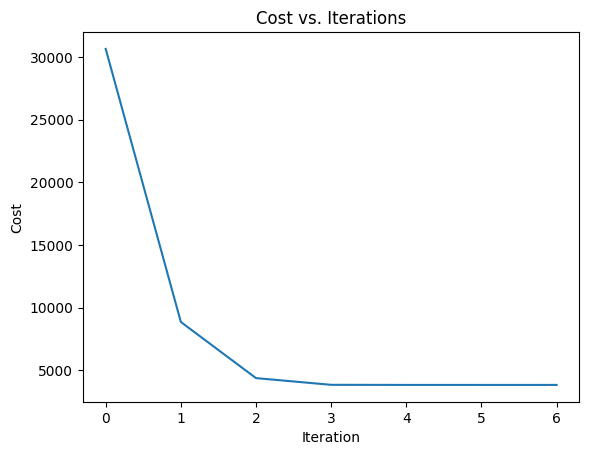

In [6]:
costs = kmeans.costs
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <br>
3 clusters: <br>
4 clusters: <br>
6 clusters: <br>
8 clusters: <br>
10 clusters: <br>
20 clusters: <br>

In [7]:
# Initialize a list to store the final costs
final_costs = []

# List of different cluster numbers to test
clusters_list = [2, 3, 4, 6, 8, 10, 20]

# Loop through each number of clusters
for n_clusters in clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    final_costs.append(float(kmeans.costs[-1]))  # Convert numpy.float64 to standard float

# Print the final costs
print("Final costs for different cluster numbers:", final_costs)

Final costs for different cluster numbers: [16252.940544368703, 9610.870669579039, 3843.71353727553, 3274.1502869766773, 2605.7486472634027, 2211.1601294355905, 1101.9897635435777]


Now write a code that plots the clusters and the locations of the centroids at each iteration

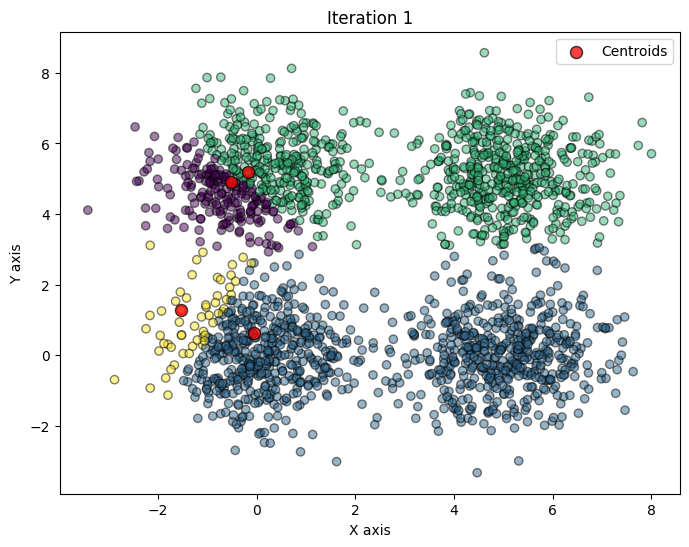

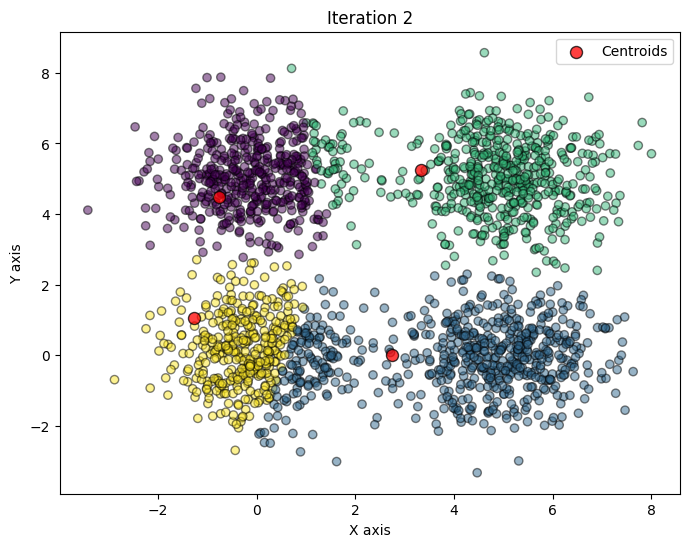

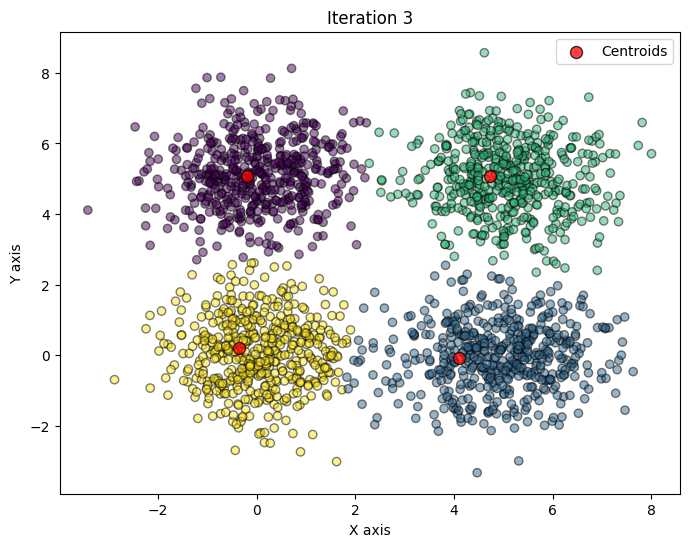

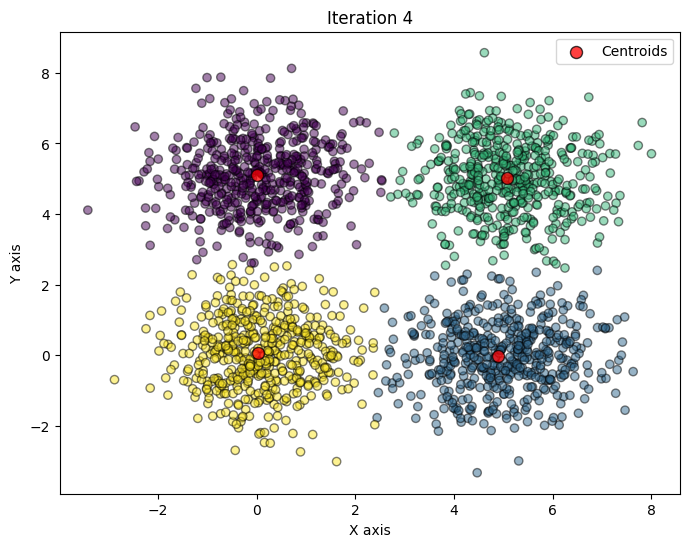

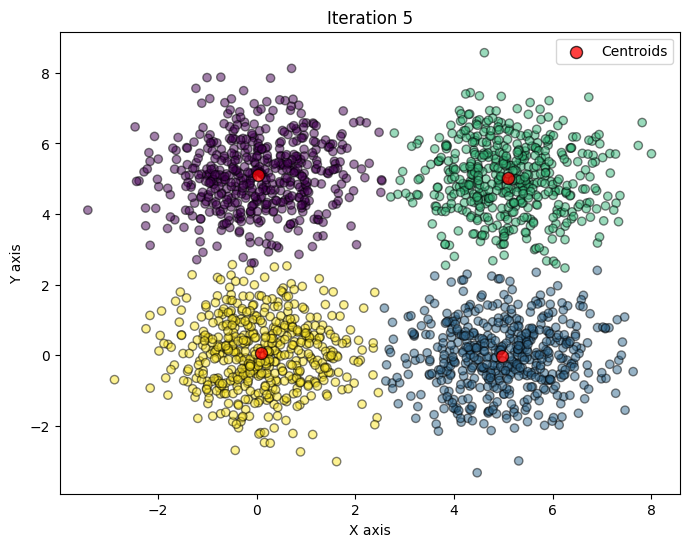

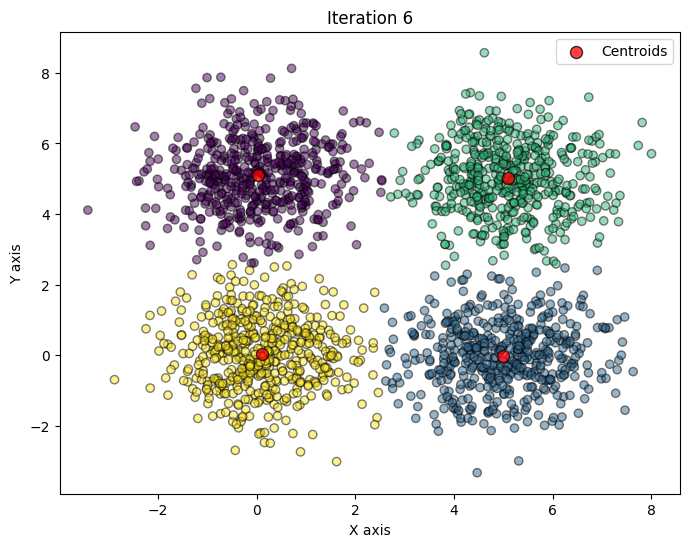

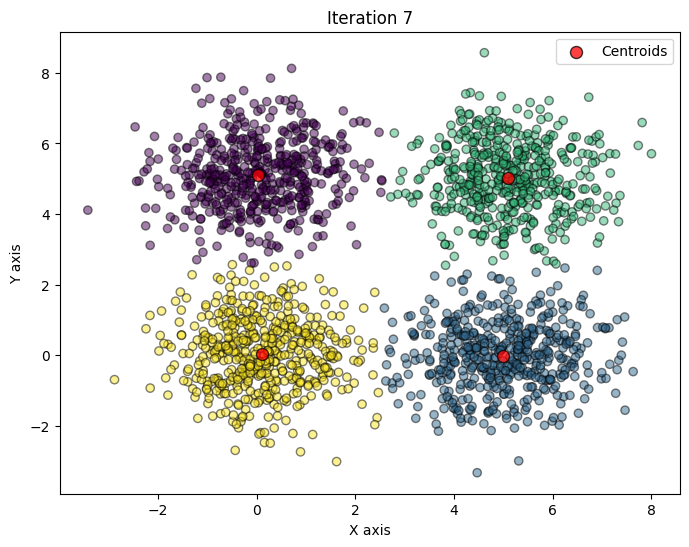

In [8]:
def plot_kmeans_iterations(X, labels_history, centroids_history):
    num_iterations = len(centroids_history)
    for i in range(num_iterations):
        plt.figure(figsize=(8, 6))
        labels = labels_history[i]
        centroids = centroids_history[i]
        
        # Scatter plot of data points colored by cluster label
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolor='k')
        
        # Scatter plot of centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.75, marker='.', edgecolors='black', label='Centroids')
        
        plt.title(f'Iteration {i + 1}')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.legend()
        plt.show()
    
kmeans = KMeans(4, max_iter=30)
kmeans.fit(X)
plot_kmeans_iterations(X, kmeans.labels_history, kmeans.centroids_history)

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [10]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [11]:
class PCA:
    def __init__(self):
        self.mean = None
        self.components = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvectors by decreasing eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices]

    def transform(self, X, n_dimensions):
        # Project the data onto the top n_dimensions eigenvectors
        X_centered = X - self.mean
        return np.dot(X_centered, self.components[:, :n_dimensions])

Run the algorithm on MNIST dataset.

In [12]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

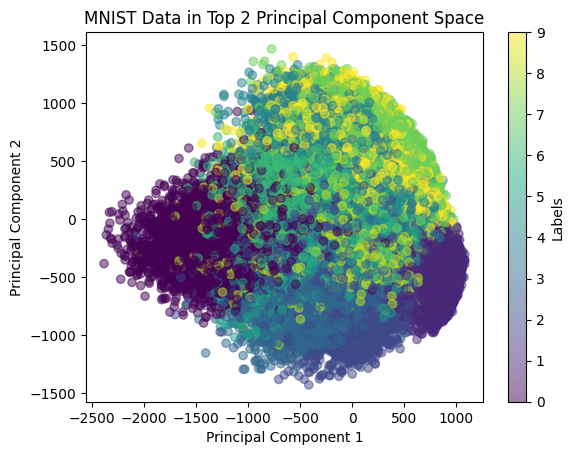

In [13]:
# Convert labels to integers for color mapping
y = [int(label) for label in y]

fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.5)

# Add color bar
cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

# Add labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('MNIST Data in Top 2 Principal Component Space')

plt.show()


As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

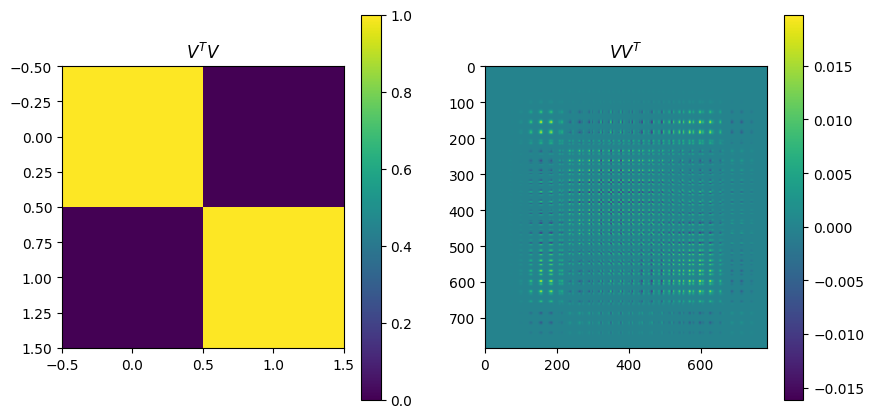

In [14]:
r = 2
V = pca.components[:, :r]

# Compute V^T V and V V^T
V_T_V = np.dot(V.T, V)
V_V_T = np.dot(V, V.T)

# Plot V^T V
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(V_T_V, cmap='viridis')
plt.title('$V^T V$')
plt.colorbar()

# Plot V V^T
plt.subplot(1, 2, 2)
plt.imshow(V_V_T, cmap='viridis')
plt.title('$V V^T$')
plt.colorbar()

plt.show()

Your Explanation:
### Explanation of Differences Between \( $V^TV$ \) and \( $VV^T$ \)

1. **\( $V^TV$ \)**:
   - This is an \( $r \times r$ \) matrix.
   - When \( $V$ \) consists of orthonormal vectors (which eigenvectors are), \( $V^TV$ \) will be an identity matrix.
   - Each element represents the dot product between eigenvectors, which will be zero if they are orthonormal.

2. **\( $VV^T$ \)**:
   - This is a \( $d \times d$ \) matrix.
   - This matrix is a projection matrix that projects the data onto the subspace spanned by the top $r$ eigenvectors.
   - It shows how the original space is represented in the reduced subspace.


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [15]:
def pca_reconstruction(x, n_dimensions, pca):
    # Center the sample by subtracting the mean
    x_centered = x - pca.mean
    
    # Project the sample to the n-dimensional space
    x_projected = np.dot(x_centered, pca.components[:, :n_dimensions])
    
    # Reconstruct the sample back to the original space
    x_reconstructed = np.dot(x_projected, pca.components[:, :n_dimensions].T) + pca.mean
    
    return x_reconstructed


Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


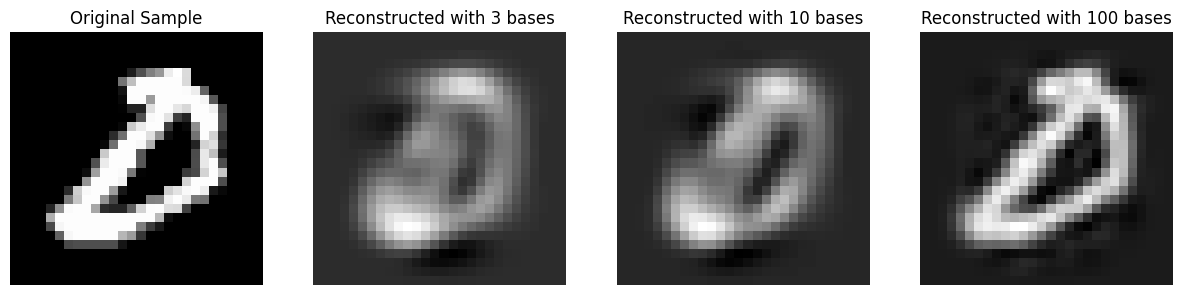

The reconstructed image with 3 bases is different from the original image.
The reconstructed image with 10 bases is different from the original image.
The reconstructed image with 100 bases is different from the original image.


In [16]:
# Sample a random image from the dataset
np.random.seed(42)
sample_index = np.random.randint(X.shape[0])
original_sample = X[sample_index]

# Perform the reconstruction from spaces of dimensions: 3, 10, 100
bases = [3, 10, 100]
reconstructed_samples = [pca_reconstruction(original_sample, base, pca) for base in bases]

# Plot original and reconstructed samples
plt.figure(figsize=(15, 5))

# Plot original sample
plt.subplot(1, len(bases) + 1, 1)
plt.imshow(original_sample.reshape(28, 28), cmap='gray')
plt.title('Original Sample')
plt.axis('off')


# Plot reconstructed samples
for i, base in enumerate(bases):
    plt.subplot(1, len(bases) + 1, i + 2)
    plt.imshow(reconstructed_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'Reconstructed with {base} bases')
    plt.axis('off')

plt.show()

# Check if the reconstructed image is the original image
for base, reconstructed_sample in zip(bases, reconstructed_samples):
    is_same = np.allclose(original_sample, reconstructed_sample)
    print(f'The reconstructed image with {base} bases is {"the same as" if is_same else "different from"} the original image.')